<a href="https://colab.research.google.com/github/wdconinc/practical-computing-for-scientists/blob/master/Lectures/lecture33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 33: Machine Learning

## Last Episode

Classification problems
- $k$-nearest neighbors ($k$-NN)
- decision trees (DT)

## Preamble

In [0]:
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

## From Linear and Logistic Regression to Neural Networks

In our discussion of linear and logistic regression we used input features $x_i$ to predict an output target $y$. In both cases we used weights $w_i$ and a bias $b$.
- In the case of linear regression we determined the weights $w_i$ and a bias $b$ by the best linear fit to our training data $x_i$:
$$ \hat{y} = \sum_i w_i x_i +b $$
where the 'best' linear fit was the one with the smallest quadratic loss function
$$ L_2 = ( \sum_n |\hat{y}_n - y_n|^2 )^{1/2} $$
- In the case of logistic regression we determined the weights $w_i$ and a bias $b$ such that the probabilities $q(x)$ given by the logistic function
$$ \hat{y} = \frac{1}{1 + e^{-(\sum_i w_i x_i + b)}} $$
resulted in the smallest value for the cross entropy loss function
$$ H(p,q) = - \sum p(x) \log q(x) $$

The only difference between these two problems is the introduction of a non-linear logistic or sigmoid *activation function*
$$ y = f(z) = \frac{1}{1 + e^{-z}} $$
with $z = \sum_i w_i x_i + b$ our usual linear combination.

This expression is the core unit in the neural networks we will construct: the *single-layer perceptron* or *neuron*. It is called this way in analogy to biological neurons which receive input on the synapses and turn this through a non-linear threshold function into a signal at the cell body.

<img src="https://www.springboard.com/blog/wp-content/uploads/2017/03/Perceptron.png" width="33%">

There are many options for the [activation function](https://en.wikipedia.org/wiki/Activation_function):
- linear or identity: $y = f(z) = z$ (any rescaling is equivalent to changing the weights and bias)
- step function: $f(z > 0) = 1$ and $f(z < 0) = 0$
- sigmoid or logistic function: $f(z) = \frac{1}{1 + e^{-z}}$
- rectified linear unit (relu): $f(z > 0) = z$ and $f(z < 0) = 0$
- hyperbolic tangent: $f(z) = \tanh z$
- inverse tangent: $f(z) = \tan^{-1} z$
- ...

All have their advantages and disadvantages. For example, the logistic function will return a value between 0 and 1 which we can interpret as a probability, but it does (therefore) not have a monotonically increasing derivative (which aids in convergence) and does not have approximate 1 for $z = 0$ (which means we may need to initialize our weights to sensible values).

### From One Layer to Multiple Layers

The real power of neural networks becomes apparent when we add one or more hidden layers between the input and the output. Instead of a single-layer perceptron, we now have a *multi-layer perceptron* (MLP), or simply an *artificial neural network* (ANN).

<img src="https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg" width="33%">

In the case of a linear activation function, we do not gain anything since we can still express all outputs in terms of linear combinations of the inputs, regardless of the hidden layers. Essentially a linear artificial neural network is nothing but a series of matrix multiplications.

But, for the non-linear activations functions we gain the ability to describe a much richer set correlations between the inputs and outputs. With non-linear activiation functions we can still think in terms of matrices, but we have to keep in mind that we apply functions at each step as well.

Of course, this comes at the cost of a combinatorical explosion of weights. This, in turn, will require that we have more data to train on so we can determine the weights of all the nodes.

## Revisiting the Diabetes Linear Regression Problem with Neural Networks

We can now revisit the very first diabetes linear regression problem with a neural network.

In [0]:
# Load the diabetes dataset
from sklearn import datasets
diabetes = datasets.load_diabetes()

We will first start with a single input feature (as we did before), and then on a second pass expand it to include all 10 input features.

In [0]:
# Use one 1 feature
#diabetes_X = diabetes.data[:, np.newaxis, 2]

# Use all 10 features
diabetes_X = diabetes.data[:, :10]

# Use a random permutation of the data
np.random.seed(0)
perm = np.arange(len(diabetes.data))
perm = np.random.permutation(len(diabetes.data))

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[perm][:-20]
diabetes_X_test = diabetes_X[perm][-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[perm][:-20]
diabetes_y_test = diabetes.target[perm][-20:]

Since we are trying to replicate the previous results, let's start with a linear activation function (named `identity` since it projects $z$ onto $f(z) = z$ itself). We will add a single hidden layer with 10 neurons.

In [0]:
# Create MLP regression object
from sklearn import linear_model, neural_network
regr = neural_network.MLPRegressor(hidden_layer_sizes = (10,), activation = "identity", verbose = 10)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

Iteration 1, loss = 14536.05502940
Iteration 2, loss = 14532.43632654
Iteration 3, loss = 14528.77143497
Iteration 4, loss = 14525.19577129
Iteration 5, loss = 14521.60794229
Iteration 6, loss = 14518.03763502
Iteration 7, loss = 14514.47008410
Iteration 8, loss = 14510.93976317
Iteration 9, loss = 14507.43535596
Iteration 10, loss = 14503.85328620
Iteration 11, loss = 14500.33489898
Iteration 12, loss = 14496.83283114
Iteration 13, loss = 14493.34778770
Iteration 14, loss = 14489.88079639
Iteration 15, loss = 14486.39156823
Iteration 16, loss = 14482.92013378
Iteration 17, loss = 14479.49095587
Iteration 18, loss = 14476.00135319
Iteration 19, loss = 14472.56926421
Iteration 20, loss = 14469.13375630
Iteration 21, loss = 14465.73094951
Iteration 22, loss = 14462.29293836
Iteration 23, loss = 14458.89340897
Iteration 24, loss = 14455.44410119
Iteration 25, loss = 14452.07854113
Iteration 26, loss = 14448.65676976
Iteration 27, loss = 14445.33831260
Iteration 28, loss = 14442.01372441
I

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=10, warm_start=False)

When we plot the loss curve for each training iteration we can determine if the artificial neural network has completed training...

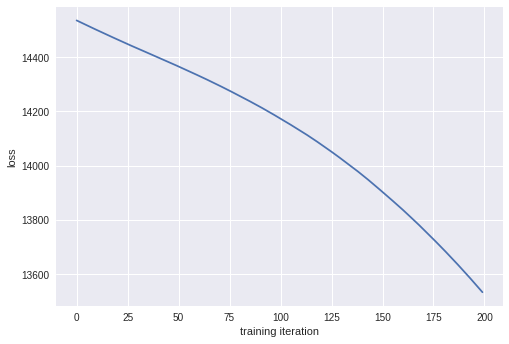

In [0]:
plt.plot(regr.loss_curve_)
plt.xlabel("training iteration")
plt.ylabel("loss")
plt.show()

Clearly we did not let the training complete enough iterations.

In [0]:
# Create MLP regression object
from sklearn import linear_model, neural_network
regr = neural_network.MLPRegressor(hidden_layer_sizes = (10,), activation = "logistic", max_iter = 20000, verbose = 10)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

Iteration 1, loss = 14442.49244817
Iteration 2, loss = 14439.41115179
Iteration 3, loss = 14436.40264881
Iteration 4, loss = 14433.35842760
Iteration 5, loss = 14430.29427533
Iteration 6, loss = 14427.26115557
Iteration 7, loss = 14424.18723885
Iteration 8, loss = 14421.13354579
Iteration 9, loss = 14418.06310136
Iteration 10, loss = 14415.01174091
Iteration 11, loss = 14411.93990341
Iteration 12, loss = 14408.82397078
Iteration 13, loss = 14405.72637565
Iteration 14, loss = 14402.65117242
Iteration 15, loss = 14399.56340352
Iteration 16, loss = 14396.41478471
Iteration 17, loss = 14393.29867857
Iteration 18, loss = 14390.16274761
Iteration 19, loss = 14387.01710850
Iteration 20, loss = 14383.90126358
Iteration 21, loss = 14380.78468434
Iteration 22, loss = 14377.68334496
Iteration 23, loss = 14374.59367091
Iteration 24, loss = 14371.48812693
Iteration 25, loss = 14368.35556286
Iteration 26, loss = 14365.24836257
Iteration 27, loss = 14362.10775536
Iteration 28, loss = 14358.98453852
I

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=10, warm_start=False)

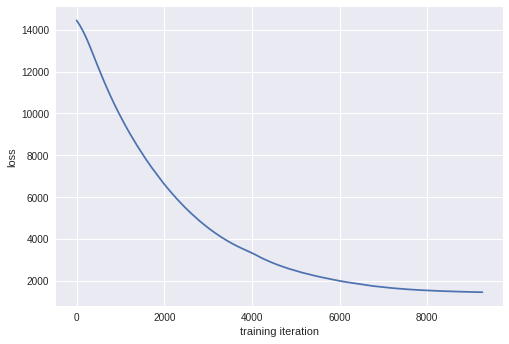

In [0]:
plt.plot(regr.loss_curve_)
plt.xlabel("training iteration")
plt.ylabel("loss")
plt.show()

We can look at the coefficients, as we did in the case of linear regression, but there is not nearly as much that we can deduce from them.

In [0]:
print(len(regr.coefs_), "layers of weights")
for layer in range(len(regr.coefs_)):
  print(np.shape(regr.coefs_[layer]), "from layer %d to layer %d" % (layer, layer+1))
  print(regr.coefs_[layer])

2 layers of weights
(10, 10) from layer 0 to layer 1
[[ 2.60827741  2.53306621  2.52242164  2.49379829  2.60041598  2.56332293
   2.5075031   2.56997802  2.64192846  2.57487644]
 [-2.15058342 -2.11248339 -2.20346925 -2.10738436 -2.1735311  -2.11721021
  -2.01445645 -2.0093696  -2.1546501  -2.08563328]
 [ 7.97848483  8.25644369  8.23301622  8.39555275  8.48250839  8.63998104
   7.99930388  8.17541208  8.29122097  8.19383657]
 [ 7.29515913  7.20258229  7.61492433  7.25749608  7.61808031  7.42903471
   7.34341696  7.3247828   7.45332219  7.66024019]
 [ 2.444351    2.14238885  2.31256155  2.3568018   2.33327557  2.44878491
   2.17574298  2.27571012  2.25736129  2.50925369]
 [ 2.61624926  3.08708895  2.86884824  2.86234947  2.95809473  2.86140374
   2.9045209   2.92776849  2.98115463  2.85203835]
 [-7.52080791 -7.60424968 -7.67504972 -7.61473391 -7.8091697  -7.86866005
  -7.41769914 -7.50729443 -7.68260785 -7.74998445]
 [ 6.18502848  5.89333461  6.33045923  6.06054703  6.10621229  6.1096748

We can also look at how well we are doing on the test data set, compared the training data set.

In [0]:
print(regr.score(diabetes_X_train, diabetes_y_train))
print(regr.score(diabetes_X_test, diabetes_y_test))

-0.1467846244125166
-0.05670883510547942


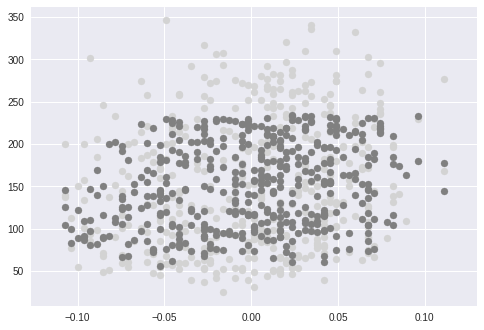

In [0]:
# Make predictions using the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# Make predictions using the testing set
diabetes_y_test_pred = regr.predict(diabetes_X_test)

# Plot outputs
plt.scatter(diabetes_X_train[:,0], diabetes_y_train, color='lightgray')
plt.scatter(diabetes_X_train[:,0], diabetes_y_train_pred, color='gray')

Of course, the linear dependence is not a surprise with only a single input feature and an linear (identity) activation function.

We can now go back and repeat this with a logistic activation function and all 10 input features.

## Handwriting Recognition with Artificial Neural Networks

Now that we have, in artificial neural networks, a general approach to solve both regression and classification problems, let's look at a more difficult problem which we cannot solve in traditional ways: recognition of handwritten digits (a standard machine learning problem).

In [0]:
# Let's first get the MNIST data set
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

As usual we split the data into a training and test data set.

In [0]:
# Use a random permutation
np.random.seed(0)
perm = np.arange(len(mnist.data))
perm = np.random.permutation(len(mnist.data))

# Rescale, split in training and test data
X, y = mnist.data[perm] / 255., mnist.target[perm]
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

The data consists of $28 \times 28 = 784$ linearized pixel values as integer gray scales between 0 and 255. We can reshape those back into a square matrix to plot them, along with their classification.

Correct classification:  5.0


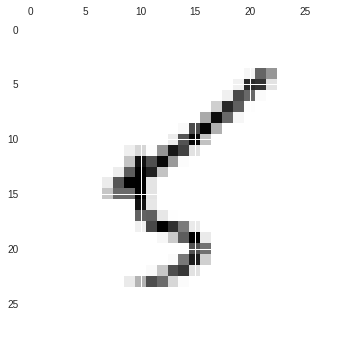

In [0]:
# Reshape an example entry into a 28 x 28 image and plot
i = 495
plt.matshow(X_train[i].reshape((28,28)))
print("Correct classification: ", y_train[i])

Let's create an artificial neural network classifier that has a hidden layer with 100 nodes.

In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=40, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-3, random_state=1,
                    learning_rate_init=.1, activation = "relu")

Let's now train our network. This may take a while... (even if the tolerance is set to a fairly large value)

In [0]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.29249660
Iteration 2, loss = 0.12361080
Iteration 3, loss = 0.09000660
Iteration 4, loss = 0.07097907
Iteration 5, loss = 0.05806030
Iteration 6, loss = 0.04855646
Iteration 7, loss = 0.04091454
Iteration 8, loss = 0.03512452
Iteration 9, loss = 0.02940072
Iteration 10, loss = 0.02546369
Iteration 11, loss = 0.02171612
Iteration 12, loss = 0.01749820
Iteration 13, loss = 0.01542681
Iteration 14, loss = 0.01283184
Iteration 15, loss = 0.01078268
Iteration 16, loss = 0.00875058
Iteration 17, loss = 0.00711103
Iteration 18, loss = 0.00634392
Iteration 19, loss = 0.00510398
Iteration 20, loss = 0.00475525
Iteration 21, loss = 0.00382842
Iteration 22, loss = 0.00351482
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=40, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.001, validation_fraction=0.1, verbose=10,
       warm_start=False)

If we had more time, we could continue improving on the loss curve.

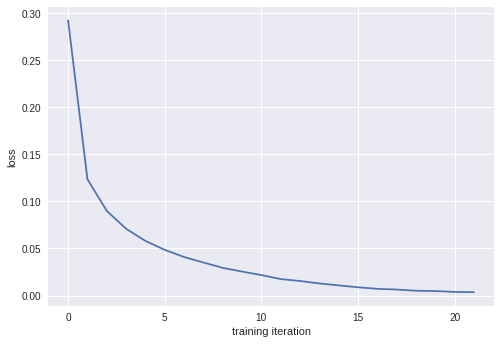

In [0]:
plt.plot(mlp.loss_curve_)
plt.xlabel("training iteration")
plt.ylabel("loss")
plt.show()

However, even with this level of training we already obtain very good results on the test data set. The scores below are the accuracy scores: i.e. 0.99 means a 99% accuracy.

In [0]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.999950
Test set score: 0.978000


We can obtain the probabilities for the classification. Similar to the logistic regression the last output will return a normalized sum of probabilities. This is inherent to our use of the logistic regression.

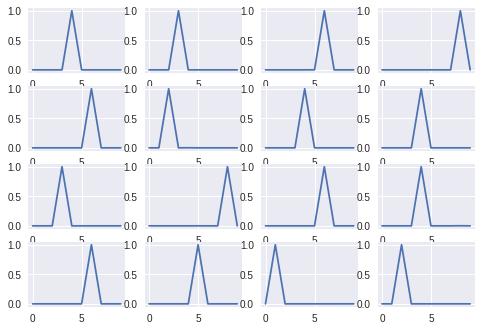

In [0]:
fig, ax = plt.subplots(4, 4)
for ix in range(4):
  for iy in range(4):
    ax[ix,iy].plot(mlp.predict_proba(X_test)[4*ix+iy])

In [0]:
print(len(mlp.coefs_), "layers of weights")
for layer in range(len(mlp.coefs_)):
  print(np.shape(mlp.coefs_[layer]), "from layer %d to layer %d" % (layer, layer+1))

2 layers of weights
(784, 100) from layer 0 to layer 1
(100, 10) from layer 1 to layer 2


Instead of inspecting the coefficients as numbers, we can look at them as matrices 

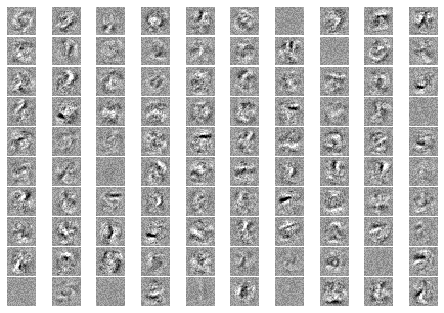

In [0]:
fig, axes = plt.subplots(10, 10)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap = plt.cm.gray, vmin = .5 * vmin,
               vmax = .5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.subplots_adjust(hspace = 0.05, wspace = 0.0)
plt.show()

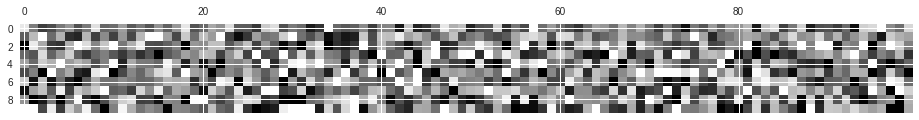

In [0]:
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[1].min(), mlp.coefs_[1].max()
plt.matshow(mlp.coefs_[1].T, cmap = plt.cm.gray, vmin = .5 * vmin,
           vmax = .5 * vmax)
plt.show()

Even in a linear model (`identity`) we can't interpret the coefficients very well even if we multiply them back to the inputs.

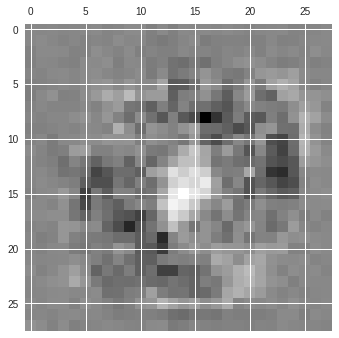

In [0]:
target = 0
activation_for_one_target = np.ones((784,)) * mlp.intercepts_[1][target]
for i in range(100):
  activation_for_one_target += mlp.intercepts_[0][i] + mlp.coefs_[0][:,i] * mlp.coefs_[1][i,target] 
plt.matshow(activation_for_one_target.reshape((28,28)))